In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

fold = 1
X = np.load(f"data/nparrays/{str(fold).zfill(2)}.npy")
Y = np.load(f"data/nparrays/labels/{str(fold).zfill(2)}.npy")

In [13]:
X = np.transpose(X, (0,2,1))

In [14]:
grad = np.gradient(X, axis=2)

In [15]:
print(np.shape(grad))

(2175, 12, 1000)


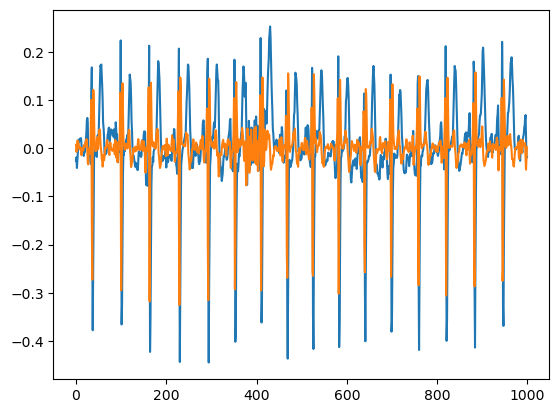

In [16]:
plt.plot(X[0,0])
plt.plot(grad[0,0])

In [17]:
mean = np.mean(X, axis=2)
std = np.std(X, axis=2)

In [29]:
stft = sp.signal.stft(X, axis=2)

In [35]:
print(np.shape(stft[0]))
print(np.shape(X))

(129,)
(2175, 12, 1000)


In [11]:
print(mean)

[[ 3.916e-03  6.958e-03  3.059e-03 ... -2.038e-03 -2.400e-03  2.171e-03]
 [-2.713e-03 -2.511e-03  2.250e-04 ...  6.484e-03 -3.748e-03 -6.990e-04]
 [-4.069e-03  3.576e-03  7.654e-03 ... -9.900e-05 -2.551e-03 -3.250e-04]
 ...
 [-2.106e-03 -3.304e-03 -1.189e-03 ... -1.329e-03 -1.285e-03 -2.105e-03]
 [ 1.460e-04 -1.076e-03 -1.217e-03 ...  2.000e-05  3.435e-03 -1.516e-03]
 [-7.870e-04 -3.846e-03 -3.036e-03 ... -4.773e-03 -3.398e-03 -3.808e-03]]


In [27]:
features = np.concatenate((mean, std, min_, max_), axis=1)

In [28]:
print(np.shape(features))

(2175, 48)


In [36]:
from sklearn.decomposition import PCA as PCA

features = (features - features.mean(axis=0)) / (features.std(axis=0))
pca = PCA(n_components=10)
X_pca = pca.fit_transform(features)

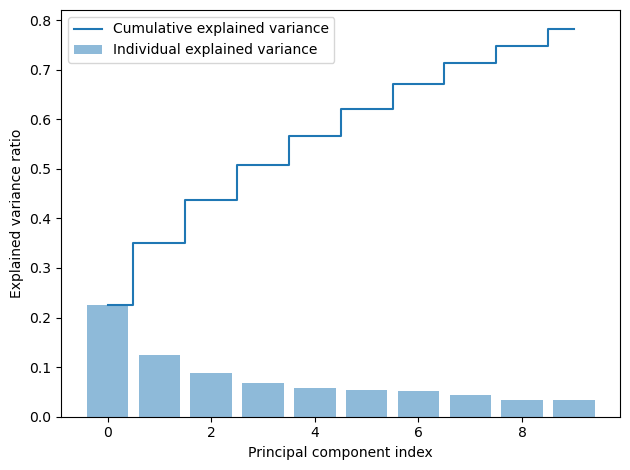

In [37]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [38]:
print(np.shape(X_pca))

(2175, 10)


In [43]:
c = Y[:,0]
print(np.shape(c))

(2175,)


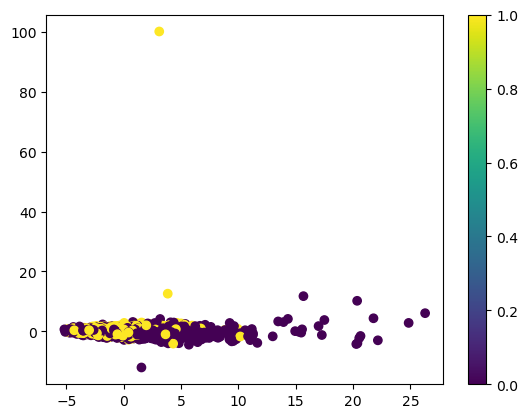

In [45]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=c)
plt.colorbar()
plt.show()